In [2]:
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
import cv2
import cv2 as cv
%matplotlib inline
from PIL import Image
from PIL import ImageFilter
import pandas as pd
import math
import seaborn as sns
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected = True)
cf.go_offline()

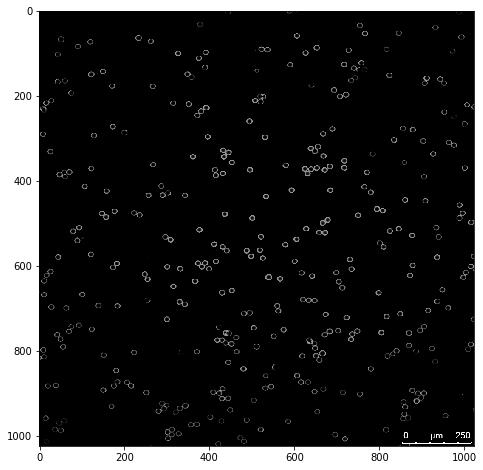

In [10]:
image = 'Tube6_Image034.png'                            #Reading image
img = cv2.imread(image, 1)                              #Reading image into openCV
original = img.copy()                                #copying image
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)        #converting to gray scale
plt.rcParams["figure.figsize"] = (10,8)            #resizing image
plt.imshow(img, cmap = 'gray')                     

In [11]:
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 4, 5, param1=50, param2=40, minRadius=2,maxRadius=9) #HOUGHCV FORMAL FUNCTION
all_circles_rounded = np.uint16(np.around(circles))                                          #converting to numpy and correct data type

In [12]:

stored_circle_values = all_circles_rounded                    #stores all circles that Hough Circles has detected
print (str(stored_circle_values.shape[1]))                     # prints the number of circles that Hough circles actually found 


366


In [13]:
for (x, y , r) in stored_circle_values[0,:]:               #draws two circles wherever the two detected circles were found
    cv.circle(original, (x, y), r , (0,255,0),1)        
    cv.circle(original, (x,y), 1, (0,255,255), 1)

In [6]:
cv.imshow('Output', original)                              #Outputs file
cv.waitKey(0)

0

In [15]:
#CODE FOR SHARPENING IMAGES
#kernel = np.array([[1, -1, 0], 
#                   [-1, 9,-1], 
 #                  [0, 0, -5]])

#image_sharp = cv2.filter2D(img, -1, kernel)
#plt.imshow(image_sharp, cmap = 'gray')

In [14]:
'''For reading in data into a pandas dataframe'''

df = pd.DataFrame([list(l) for l in stored_circle_values]).stack().apply(pd.Series).reset_index(1, drop=True)
df.columns = ['X-Coordinate' , 'Y-Coordinate' , 'Radius']
df.index = range(1,len(df)+1)
pi = math.pi
df['Diameter'] = df['Radius']*2
df['Circumference'] = 2*pi*df['Radius']
df['Area'] = pi*df['Radius']**2


In [15]:
df.head()

,X-Coordinate,Y-Coordinate,Radius,Diameter,Circumference,Area
1,430,662,7,14,43.982297,153.938040
2,666,806,7,14,43.982297,153.938040
3,862,930,7,14,43.982297,153.938040
4,898,910,7,14,43.982297,153.938040
5,906,390,6,12,37.699112,113.097336


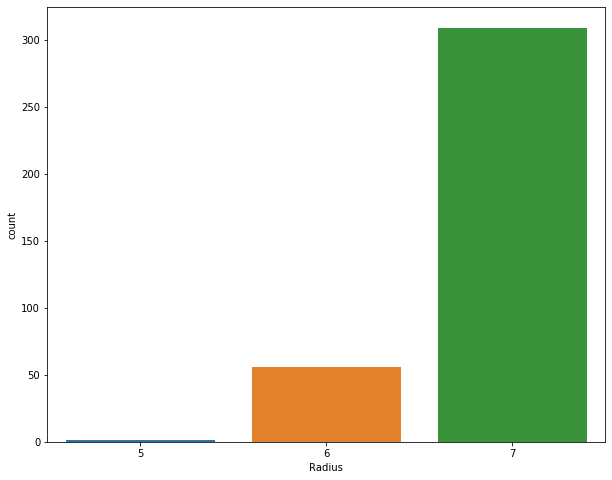

In [16]:
sns.countplot(x='Radius', data = df )

In [17]:
df['Radius'].iplot(kind = 'hist')

In [11]:
df['Radius'].value_counts()

7    328
6    108
5      2
Name: Radius, dtype: int64